# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [1]:
# Solución propuesta

import os
os.getcwd()

'c:\\Users\\eslun\\OneDrive\\Documentos\\EAN\\PANDAS\\GUIA_3\\Entregable\\Analisis_Accidentes_NY'

In [2]:
os.makedirs('Guia 3', exist_ok=True)

In [3]:
os.path.exists('/content/Guia 3/accidents-1.csv')

False

In [8]:
import pandas as pd
df1 = pd.read_csv('Guia 3/accidents-1.csv', sep=';')
df1.head(25)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
5,08/20/2019,7:15,QUEENS,11354.0,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4191802,Sedan,NaN,NaN,NaN,NaN
6,08/19/2019,12:00,QUEENS,11422.0,40.669327,-73.735330,241 STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4191196,Sedan,Sedan,NaN,NaN,NaN
7,09/22/2018,11:25,BRONX,10465.0,40.836227,-73.822920,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4004118,Sedan,NaN,NaN,NaN,NaN
8,09/22/2018,15:56,BRONX,10451.0,40.819298,-73.921880,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3985745,Sedan,NaN,NaN,NaN,NaN
9,08/18/2019,12:43,BRONX,10451.0,NaN,NaN,EAST 149 STREET,0,0,0,...,Passing Too Closely,NaN,NaN,NaN,4191092,Sedan,Sedan,NaN,NaN,NaN


In [22]:
df1.shape


(238522, 24)

In [23]:
# identificar valores faltantes
print("Valores Faltantes\n")
print(df1.isnull().sum())

Valores Faltantes

DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64


In [ ]:
# Realizar las imputaciones propuestas en el enunciado
print("Imputaciones\n")
df_clean = df1.copy()
df_clean.fillna({'ZIP CODE':df_clean['ZIP CODE'].mode()[0]}, inplace=True) # ZIP CODE = Moda
df_clean.fillna({'LATITUDE':df_clean['LATITUDE'].mean()}, inplace=True) # LATITUDE = media
df_clean.fillna({'LONGITUDE':df_clean['LONGITUDE'].mean()}, inplace=True) # LONGITUDE = media
df_clean.fillna({'ON STREET NAME': 'Unknown'}, inplace=True)

for i in range(1, 6):
    df_clean.fillna({f'CONTRIBUTING FACTOR VEHICLE {i}': 'Unspecified'}, inplace=True)
    df_clean.fillna({f'VEHICLE TYPE CODE {i}': 'Unknown'}, inplace=True)

print(df_clean.isnull().sum())

df_clean.head()

Imputaciones

DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,Unknown,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3988123,Sedan,Unknown,Unknown,Unknown,Unknown
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3987962,Sedan,Unknown,Unknown,Unknown,Unknown
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,Unknown,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4193132,Sedan,Unknown,Unknown,Unknown,Unknown
3,09/23/2018,13:10,QUEENS,11367.0,40.670093,-73.818716,MAIN STREET,0,0,1,...,Unspecified,Unspecified,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,Unknown,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4192111,Sedan,Sedan,Unknown,Unknown,Unknown


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [X] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


In [ ]:
# Solución propuesta

# determinamos que tipo de dato se tiene en la columna DATE

print(df_clean.dtypes)

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
ON STREET NAME                    object
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
VEHICLE TYPE CODE 4               object
VEHICLE TYPE CODE 5               object
dtype: object


In [ ]:
data_fechas = df_clean.copy()
data_fechas['DATE'] = pd.to_datetime(data_fechas['DATE'])
data_fechas['DATE'] = data_fechas['DATE'].dt.to_period('M') # seleccionamos unicamente año y mes de la columna DATE
data_fechas.dtypes



,0
DATE,period[M]
TIME,object
BOROUGH,object
ZIP CODE,float64
LATITUDE,float64
LONGITUDE,float64
ON STREET NAME,object
NUMBER OF PEDESTRIANS INJURED,int64
NUMBER OF PEDESTRIANS KILLED,int64
NUMBER OF CYCLIST INJURED,int64


In [ ]:
accidentes_por_mes = data_fechas.copy() # contamos el numero de accidentes por mes, creamos 2 columnas al final para separar el mes y el año
accidentes_por_mes['month'] = accidentes_por_mes['DATE'].dt.month
accidentes_por_mes['year'] = accidentes_por_mes['DATE'].dt.year
accidentes_por_mes.head()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,month,year
0,2018-09,12:12,BRONX,10454.0,40.808987,-73.911316,Unknown,0,0,0,...,Unspecified,Unspecified,3988123,Sedan,Unknown,Unknown,Unknown,Unknown,9,2018
1,2018-09,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,3987962,Sedan,Unknown,Unknown,Unknown,Unknown,9,2018
2,2019-08,19:30,QUEENS,11101.0,40.755490,-73.939530,Unknown,0,0,0,...,Unspecified,Unspecified,4193132,Sedan,Unknown,Unknown,Unknown,Unknown,8,2019
3,2018-09,13:10,QUEENS,11367.0,40.670093,-73.818716,MAIN STREET,0,0,1,...,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown,9,2018
4,2019-08,22:40,BRONX,10468.0,40.868336,-73.901270,Unknown,0,0,0,...,Unspecified,Unspecified,4192111,Sedan,Sedan,Unknown,Unknown,Unknown,8,2019


In [ ]:
# contabilizamos el total de accidentes por mes de cada año

total_accidentes_mes = accidentes_por_mes.groupby(['month', 'year']).size().reset_index(name='accidentes')
total_accidentes_mes.head()


,month,year,accidentes
0,1,2019,4628
1,2,2019,10310
2,3,2019,11482
3,4,2019,10833
4,5,2018,24


In [ ]:
# convertir el numero del MES en el nombre del MES
import calendar

df_year = total_accidentes_mes.copy()
df_year['month'] = df_year['month'].apply(lambda x: calendar.month_abbr[x])

df_year.head()

,month,year,accidentes
0,Jan,2019,4628
1,Feb,2019,10310
2,Mar,2019,11482
3,Apr,2019,10833
4,May,2018,24


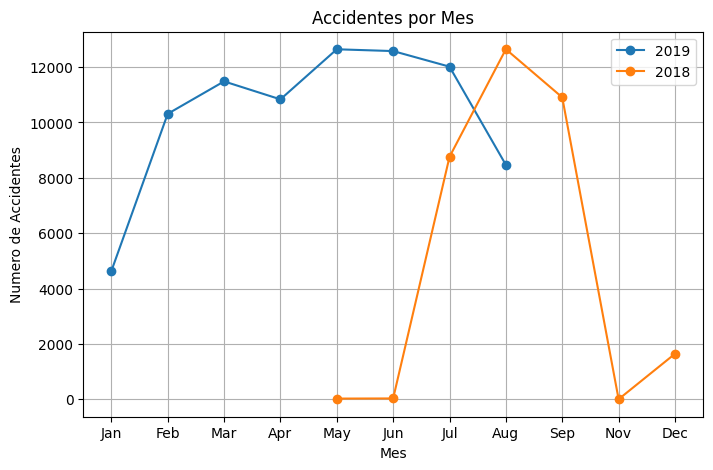

In [ ]:
# Generamos grafica de lineas para comparar el numero de accdiente mensuales por cada año (2018 y 2019)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))

for year in df_year['year'].unique():
    year_data = df_year[df_year['year'] == year]
    plt.plot(year_data['month'], year_data['accidentes'], marker='o', label=year)

plt.xlabel('Mes')
plt.ylabel('Numero de Accidentes')
plt.title('Accidentes por Mes')
plt.legend()
plt.grid()
plt.show()

**Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio**

## Respuesta: No se observa que haya un aumento en el numero de accidente durante el ultimo año y medio.

**De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?**

## Respuesta: Omitiendo que no tenemos datos en los meses de sep-dic de 2019 podemos ver que los meses con menor numero de accidentes son entre Enero-Abril de cada año, la causa de esto es probablemente que son los meses donde mas se observa invierno con fuertes nevadas y muchas personas dejan de usar sus vehiculos en estas condiciones


### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

In [ ]:
# Solución propuesta

df_accidentes_dia = df_clean.copy()
df_accidentes_dia['HOUR'] = pd.to_datetime(df_accidentes_dia['TIME']).dt.hour
df_accidentes_dia.head()


<ipython-input-19-6664c80395cd>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_accidentes_dia['HOUR'] = pd.to_datetime(df_accidentes_dia['TIME']).dt.hour


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,Unknown,0,0,0,...,Unspecified,Unspecified,Unspecified,3988123,Sedan,Unknown,Unknown,Unknown,Unknown,12
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,Unspecified,3987962,Sedan,Unknown,Unknown,Unknown,Unknown,16
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,Unknown,0,0,0,...,Unspecified,Unspecified,Unspecified,4193132,Sedan,Unknown,Unknown,Unknown,Unknown,19
3,09/23/2018,13:10,QUEENS,11367.0,40.670093,-73.818716,MAIN STREET,0,0,1,...,Unspecified,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown,13
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,Unknown,0,0,0,...,Unspecified,Unspecified,Unspecified,4192111,Sedan,Sedan,Unknown,Unknown,Unknown,22


In [ ]:
total_accidentes_hora = df_accidentes_dia.groupby('HOUR').size().reset_index(name='accidentes')

total = total_accidentes_hora['accidentes'].sum()
total_accidentes_hora.head(24)

,HOUR,accidentes
0,0,4000
1,1,1746
2,2,1366
3,3,1187
4,4,1291
5,5,1418
6,6,2300
7,7,3605
8,8,6289
9,9,6197


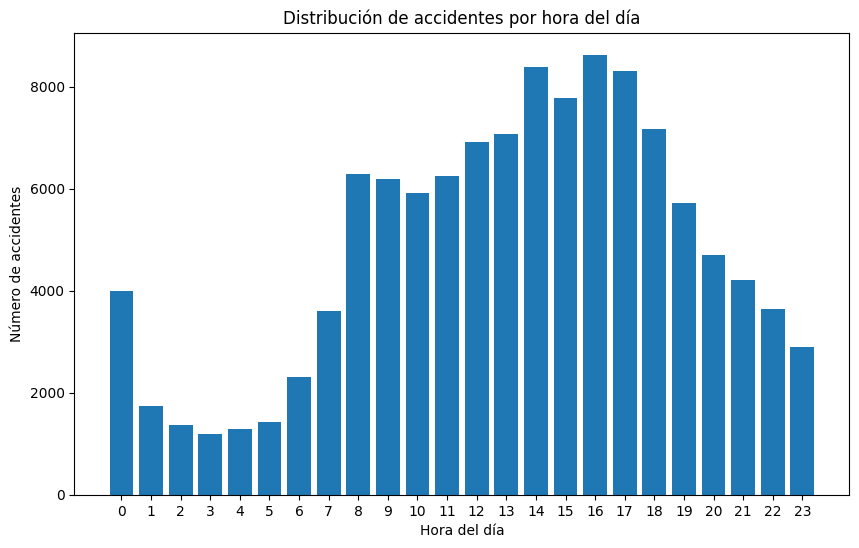

In [ ]:
plt.subplots(figsize=(10, 6))
plt.bar(total_accidentes_hora['HOUR'], total_accidentes_hora['accidentes'])
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Distribución de accidentes por hora del día')
plt.xticks(range(24))
plt.show()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

Respuesta: este enfoque no discrimina por lugar y fecha, lo cual puede afectar el analisi ya que cada ubicación representa un flujo vehicular diferente asi como el dia de la semana en que se produjo, si es entre semana o fin de semana.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

In [ ]:
# Solución propuesta

df_accidentes_dia['DIA_SEMANA'] = pd.to_datetime(df_accidentes_dia['DATE']).dt.weekday
df_accidentes_dia['DIA_SEMANA'] = df_accidentes_dia['DIA_SEMANA'].apply(lambda x: calendar.day_name[x])
df_accidentes_dia.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,DIA_SEMANA
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,Unknown,0,0,0,...,Unspecified,Unspecified,3988123,Sedan,Unknown,Unknown,Unknown,Unknown,12,Wednesday
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,3987962,Sedan,Unknown,Unknown,Unknown,Unknown,16,Tuesday
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,Unknown,0,0,0,...,Unspecified,Unspecified,4193132,Sedan,Unknown,Unknown,Unknown,Unknown,19,Thursday
3,09/23/2018,13:10,QUEENS,11367.0,40.670093,-73.818716,MAIN STREET,0,0,1,...,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown,13,Sunday
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,Unknown,0,0,0,...,Unspecified,Unspecified,4192111,Sedan,Sedan,Unknown,Unknown,Unknown,22,Tuesday


In [ ]:
total_accidentes_dia = df_accidentes_dia.groupby('DIA_SEMANA').size().reset_index(name='accidentes')
total_accidentes_dia.head(7)

,DIA_SEMANA,accidentes
0,Friday,18514
1,Monday,16641
2,Saturday,15761
3,Sunday,13442
4,Thursday,17719
5,Tuesday,17369
6,Wednesday,17507


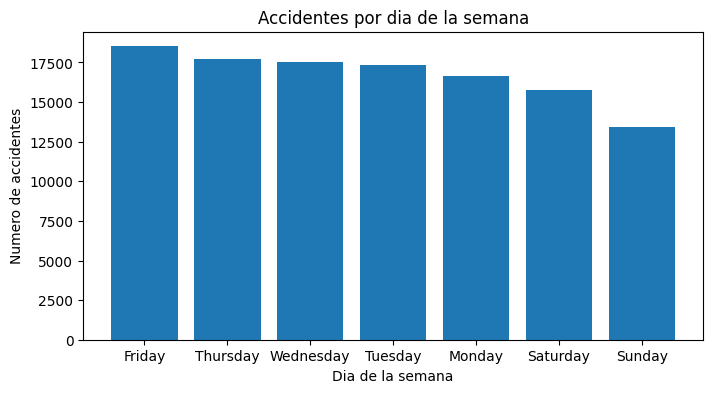

In [ ]:
# hacemos la grafica de barras

plt.figure(figsize=(8, 4))
plt.bar(df_accidentes_dia['DIA_SEMANA'].value_counts().index, df_accidentes_dia['DIA_SEMANA'].value_counts())
plt.xlabel('Dia de la semana')
plt.ylabel('Numero de accidentes')
plt.title('Accidentes por dia de la semana')
plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

In [ ]:
accidentes_municipio = df_clean.copy()
accidentes_municipio = accidentes_municipio.groupby('BOROUGH').size().reset_index(name='accidentes')
accidentes_municipio = accidentes_municipio.sort_values(by='accidentes', ascending=False)
accidentes_municipio.head(7)


,BOROUGH,accidentes
1,BROOKLYN,37777
3,QUEENS,33360
2,MANHATTAN,23192
0,BRONX,19001
4,STATEN ISLAND,3623


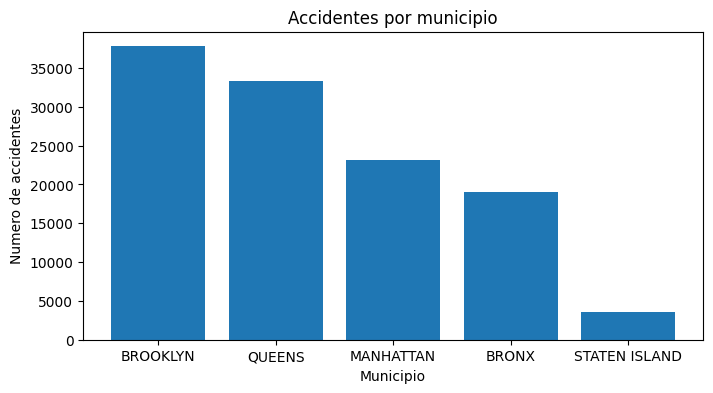

In [ ]:
# Solución propuesta

plt.figure(figsize=(8, 4))
plt.bar(accidentes_municipio['BOROUGH'], accidentes_municipio['accidentes'])
plt.xlabel('Municipio')
plt.ylabel('Numero de accidentes')
plt.title('Accidentes por municipio')
plt.show()

In [ ]:
df_area = pd.DataFrame({
    'BOROUGH': ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
    'AREA': [42.2, 69.4, 22.7, 108.7, 57.5]
    })
df_concat = pd.merge(accidentes_municipio, df_area, on='BOROUGH')
df_concat['Densidad de accidentes'] = round(df_concat['accidentes'] / df_concat['AREA'], 2)
df_concat = df_concat.sort_values(by='Densidad de accidentes', ascending=False)
df_concat.head(5)

,BOROUGH,accidentes,AREA,Densidad de accidentes
2,MANHATTAN,23192,22.7,1021.67
0,BROOKLYN,37777,69.4,544.34
3,BRONX,19001,42.2,450.26
1,QUEENS,33360,108.7,306.90
4,STATEN ISLAND,3623,57.5,63.01


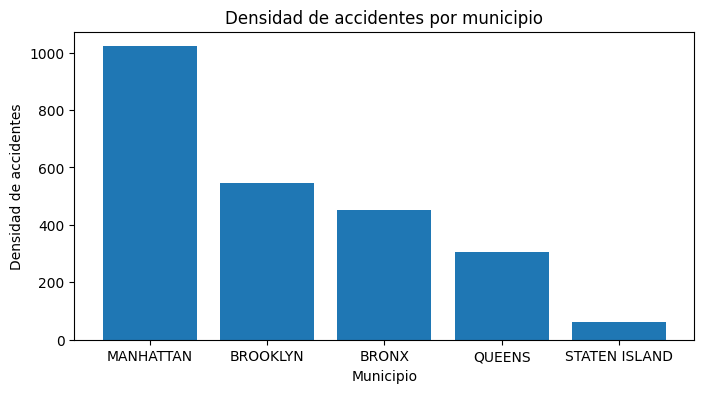

In [ ]:
# grafica de densidad de accidentes

plt.figure(figsize=(8, 4))
plt.bar(df_concat['BOROUGH'], df_concat['Densidad de accidentes'])
plt.xlabel('Municipio')
plt.ylabel('Densidad de accidentes')
plt.title('Densidad de accidentes por municipio')
plt.show()

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

#Respuesta: Podemos concluir que aunque Brooklyn tiene el mayor numero de accidentes, en manhattan se presentan la mayor cantidad de accidentes por millas cuadradas, es decir, mayor densidad de accidentes

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

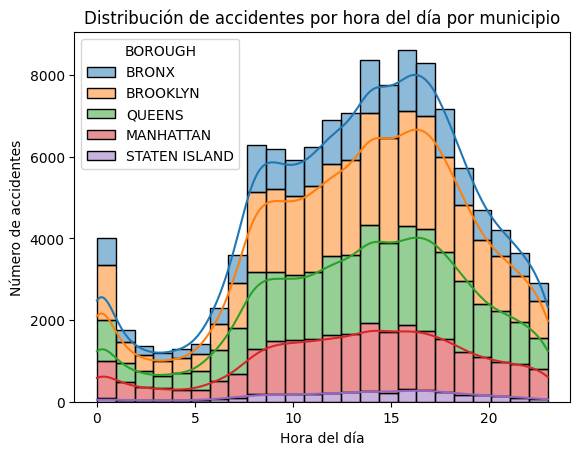

In [ ]:
# Solución propuesta: para este ejercicio crearemos un histograma superpuesto en Seaborn
# para observar mejor la correlación en el numero de accidentes por hora de cada municipio

import seaborn as sns

sns.histplot(df_accidentes_dia, x='HOUR', hue='BOROUGH', multiple='stack', bins=24, kde=True)
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Distribución de accidentes por hora del día por municipio')
plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

#**Respuesta: El patron de numero de accidentes por hora en cada municipio se repite por lo tanto para efecto del análisis se puede considerar la hora del accidente independiente del municipio donde ocurrió**

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

In [ ]:
# Solución propuesta

#eliminar Unespecified en columnas contributing factor vehicle

factor_accidentes = df_clean.copy()
factor_accidentes = factor_accidentes.replace('Unspecified', None)
factor_accidentes.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,Unknown,0,0,0,...,None,None,None,None,3988123,Sedan,Unknown,Unknown,Unknown,Unknown
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,None,None,None,None,3987962,Sedan,Unknown,Unknown,Unknown,Unknown
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,Unknown,0,0,0,...,None,None,None,None,4193132,Sedan,Unknown,Unknown,Unknown,Unknown
3,09/23/2018,13:10,QUEENS,11367.0,40.670093,-73.818716,MAIN STREET,0,0,1,...,None,None,None,None,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,Unknown,0,0,0,...,None,None,None,None,4192111,Sedan,Sedan,Unknown,Unknown,Unknown


In [ ]:
df_concat = factor_accidentes.copy()
df_concat_col = pd.concat([df_concat['CONTRIBUTING FACTOR VEHICLE 1'], df_concat['CONTRIBUTING FACTOR VEHICLE 2'], df_concat['CONTRIBUTING FACTOR VEHICLE 3'], df_concat['CONTRIBUTING FACTOR VEHICLE 4'], df_concat['CONTRIBUTING FACTOR VEHICLE 5']], ignore_index=True)
df_concat_col = df_concat_col.value_counts().reset_index(name='accidentes')
df_concat_col.head(10)


,index,accidentes
0,Driver Inattention/Distraction,36198
1,Failure to Yield Right-of-Way,9923
2,Following Too Closely,8634
3,Backing Unsafely,7207
4,Passing Too Closely,6418
5,Passing or Lane Usage Improper,6111
6,Other Vehicular,5471
7,Turning Improperly,3171
8,Unsafe Lane Changing,3153
9,Traffic Control Disregarded,2529


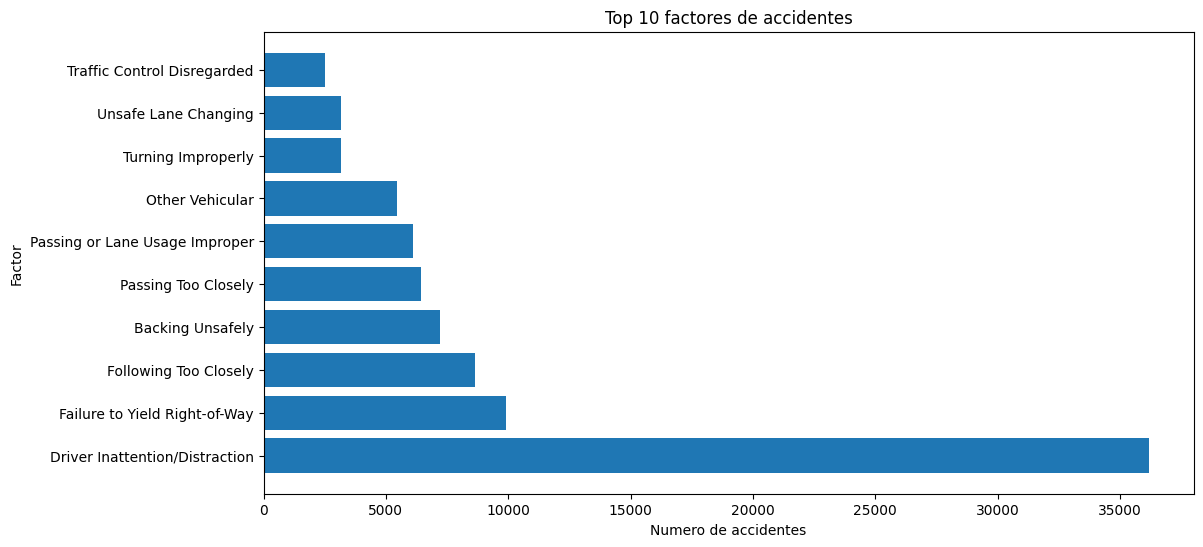

In [ ]:
# graficamos los 10 factores mas comunes de accidentes

plt.figure(figsize=(12, 6))
plt.barh(df_concat_col['index'][:10], df_concat_col['accidentes'][:10])
plt.xlabel('Numero de accidentes')
plt.ylabel('Factor')
plt.title('Top 10 factores de accidentes')
plt.xticks(rotation=0)
plt.show()

Factores que provocan la mayoría de los accidentes:
             Factor Contribuyente  Frecuencia
0  Driver Inattention/Distraction       36198
1   Failure to Yield Right-of-Way        9923
2           Following Too Closely        8634
3                Backing Unsafely        7207
4             Passing Too Closely        6418
5  Passing or Lane Usage Improper        6111
6                 Other Vehicular        5471
7              Turning Improperly        3171
8            Unsafe Lane Changing        3153
9     Traffic Control Disregarded        2529


<ipython-input-33-39630b67d7cb>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


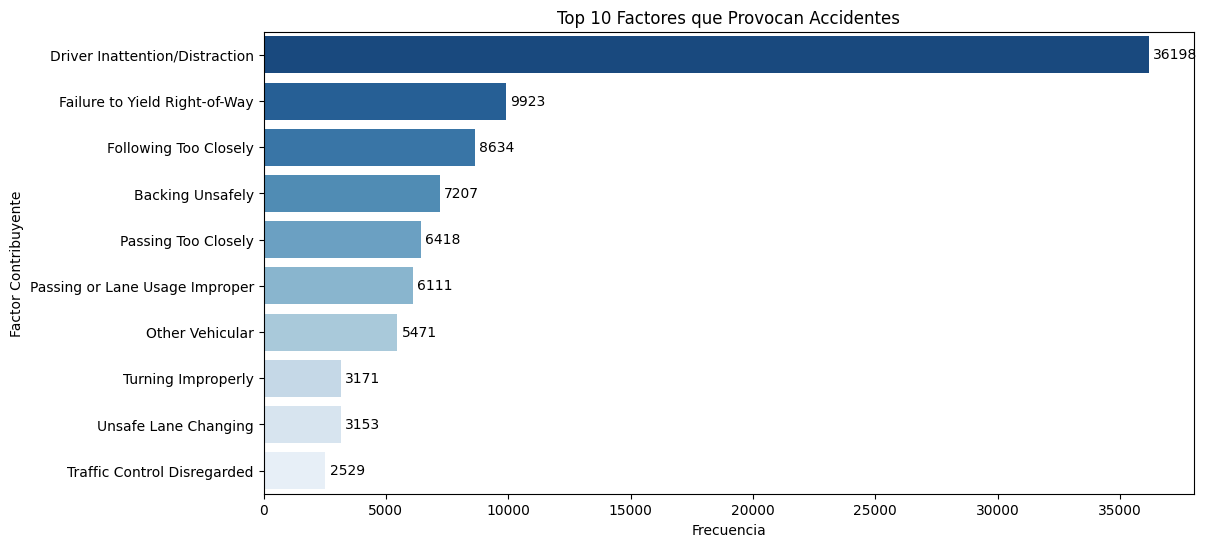

In [ ]:
#Solución propuesta ELP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener automáticamente las columnas de factores contribuyentes
factores_cols = [col for col in df1.columns if "CONTRIBUTING FACTOR" in col]

# Concatenar todas las columnas de factores contribuyentes
factores = pd.concat([df1[col] for col in factores_cols]).reset_index(drop=True)

# Eliminar valores nulos y el factor "Unspecified"
factores = factores.dropna()
factores = factores[factores != "Unspecified"]

# Contar la frecuencia de cada factor
conteo_factores = factores.value_counts().reset_index()
conteo_factores.columns = ["Factor Contribuyente", "Frecuencia"]

# Mostrar los 10 factores más comunes
print("Factores que provocan la mayoría de los accidentes:")
print(conteo_factores.head(10))

# Visualización con etiquetas
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=conteo_factores.head(10),
    x="Frecuencia",
    y="Factor Contribuyente",
    palette="Blues_r"
)

# Agregar etiquetas con los valores de frecuencia en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=3)

plt.xlabel("Frecuencia")
plt.ylabel("Factor Contribuyente")
plt.title("Top 10 Factores que Provocan Accidentes")
plt.show()

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

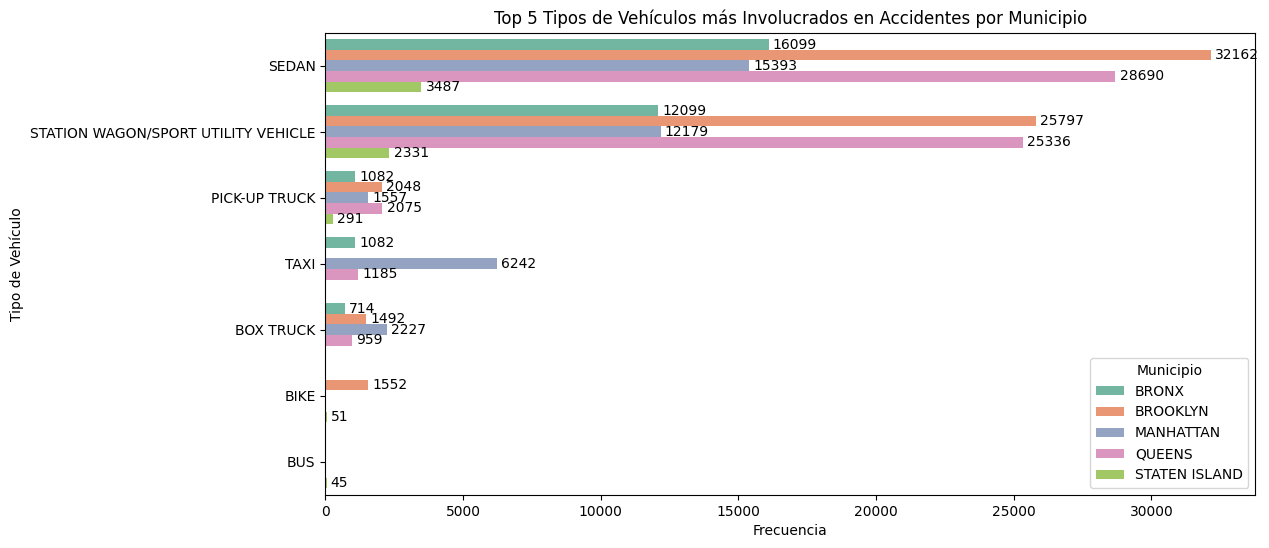

In [ ]:
# Solución propuesta
# Identificar las columnas de tipos de vehículos
vehiculos_cols = [col for col in df1.columns if "VEHICLE TYPE CODE" in col]

# Unir todas las columnas de tipos de vehículos en una sola lista
vehiculos = df1.melt(id_vars=["BOROUGH"], value_vars=vehiculos_cols, var_name="Vehiculo", value_name="Tipo de Vehiculo")

# Normalizar nombres (eliminar espacios extra y convertir a mayúsculas)
vehiculos["Tipo de Vehiculo"] = vehiculos["Tipo de Vehiculo"].str.strip().str.upper()

# Eliminar valores vacíos y desconocidos
vehiculos = vehiculos.dropna()
vehiculos = vehiculos[~vehiculos["Tipo de Vehiculo"].isin(["UNKNOWN", "UNK", "UNKNOW"])]

# Contar la frecuencia de cada tipo de vehículo en cada municipio
conteo_vehiculos = vehiculos.groupby(["BOROUGH", "Tipo de Vehiculo"]).size().reset_index(name="Frecuencia")

# Filtrar los vehículos más comunes en cada municipio (Top 5)
top_vehiculos = conteo_vehiculos.sort_values(by=["BOROUGH", "Frecuencia"], ascending=[True, False])
top_vehiculos = top_vehiculos.groupby("BOROUGH").head(5)

# Visualización
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_vehiculos, x="Frecuencia", y="Tipo de Vehiculo", hue="BOROUGH", dodge=True, palette="Set2")

# Agregar etiquetas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=3)

plt.xlabel("Frecuencia")
plt.ylabel("Tipo de Vehículo")
plt.title("Top 5 Tipos de Vehículos más Involucrados en Accidentes por Municipio")
plt.legend(title="Municipio")
plt.show()

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

<ipython-input-27-54544e753915>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factores_comunes.values, y=factores_comunes.index, palette='viridis')


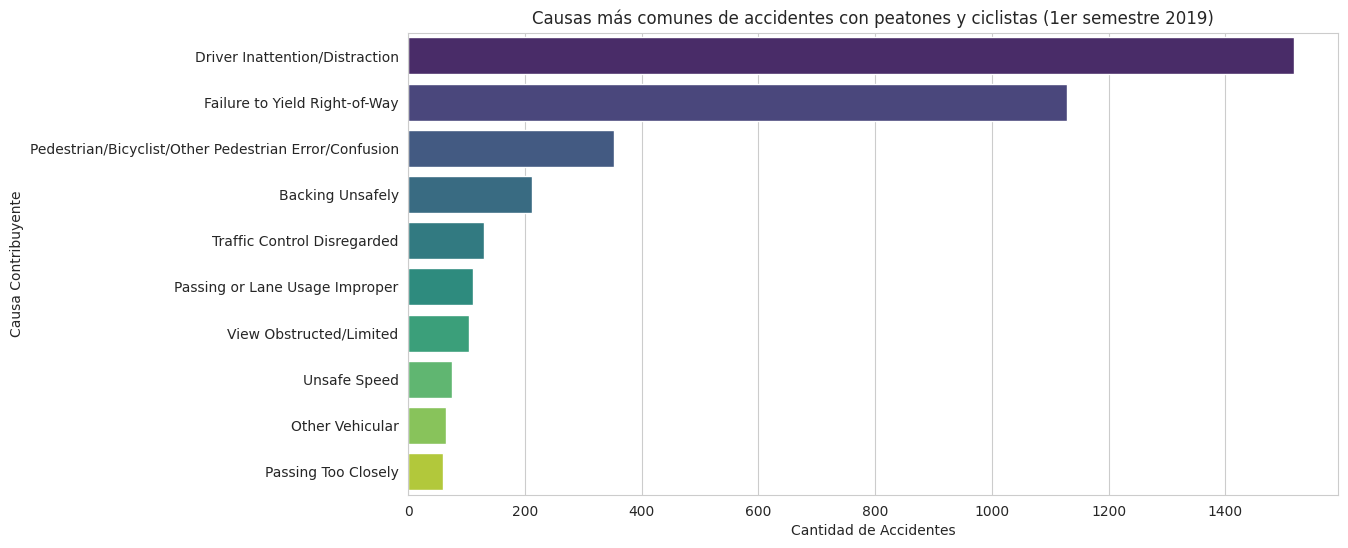

In [27]:
# Solución propuesta
# Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar accidentes del primer semestre de 2019
primer_semestre_2019 = df1[(df1['DATE'] >= '2019-01-01') & (df1['DATE'] <= '2019-06-30')]

# Filtrar solo los accidentes donde hubo peatones o ciclistas involucrados
accidentes_peatones_ciclistas = primer_semestre_2019[
    (primer_semestre_2019['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (primer_semestre_2019['NUMBER OF PEDESTRIANS KILLED'] > 0) |
    (primer_semestre_2019['NUMBER OF CYCLIST INJURED'] > 0) |
    (primer_semestre_2019['NUMBER OF CYCLIST KILLED'] > 0)
]

# Unir todas las columnas de factores contribuyentes en una sola
factores = pd.concat([
    accidentes_peatones_ciclistas['CONTRIBUTING FACTOR VEHICLE 1'],
    accidentes_peatones_ciclistas['CONTRIBUTING FACTOR VEHICLE 2'],
    accidentes_peatones_ciclistas['CONTRIBUTING FACTOR VEHICLE 3'],
    accidentes_peatones_ciclistas['CONTRIBUTING FACTOR VEHICLE 4'],
    accidentes_peatones_ciclistas['CONTRIBUTING FACTOR VEHICLE 5']
], ignore_index=True)

# Filtrar la causa "Unspecified"
factores = factores[factores != 'Unspecified']

# Contar las causas más frecuentes
factores_comunes = factores.value_counts().dropna().head(10)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=factores_comunes.values, y=factores_comunes.index, palette='viridis')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Causa Contribuyente')
plt.title('Causas más comunes de accidentes con peatones y ciclistas (1er semestre 2019)')
plt.show()

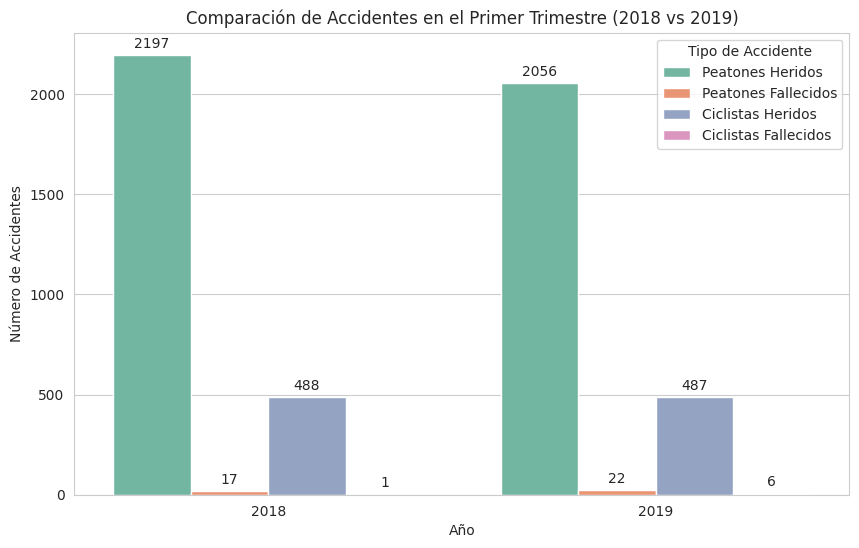

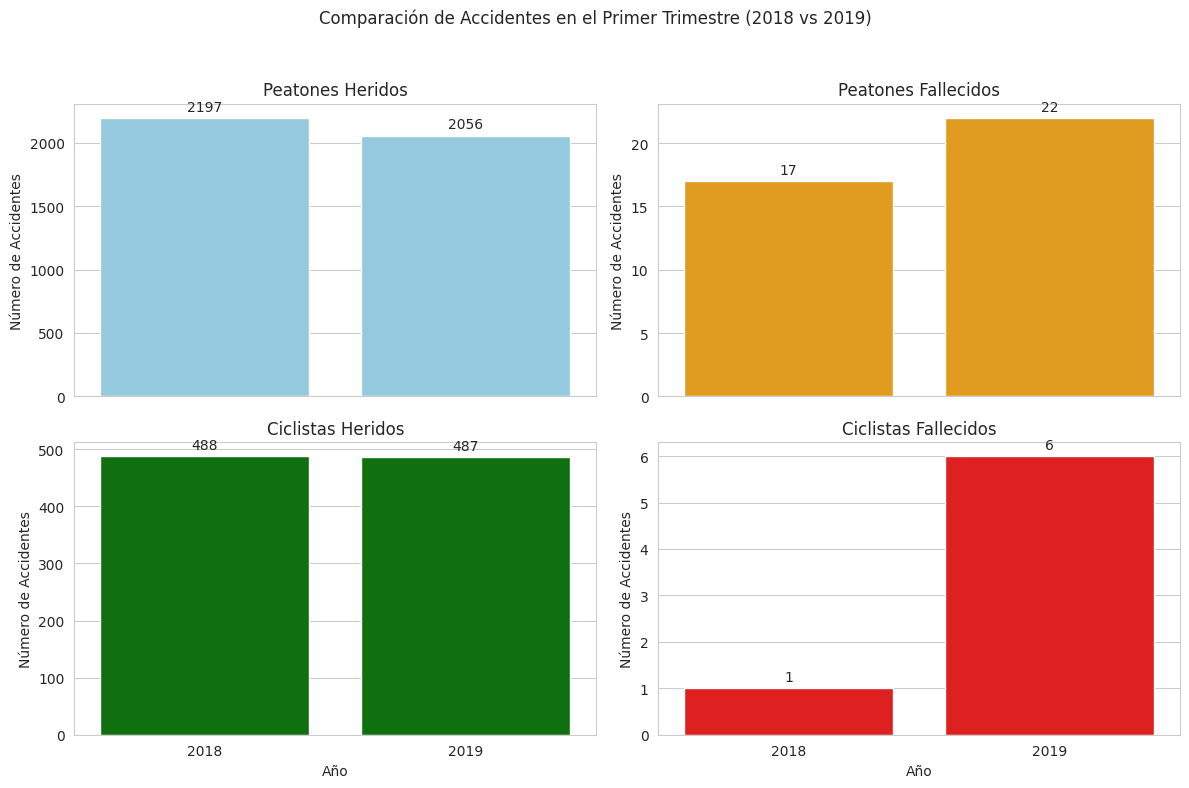

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir DATE a formato datetime asegurando el formato correcto
df1["DATE"] = pd.to_datetime(df1["DATE"], format="%m/%d/%Y")

# Filtrar datos solo del primer trimestre (enero-marzo) de 2018 y 2019
df_filtered = df1[(df1["DATE"].dt.month.isin([1, 2, 3])) & (df1["DATE"].dt.year.isin([2018, 2019]))]

# Agrupar datos por año y calcular total de heridos y fallecidos por tipo de persona
df_grouped = df_filtered.groupby(df_filtered["DATE"].dt.year).agg({
    "NUMBER OF PEDESTRIANS INJURED": "sum",
    "NUMBER OF PEDESTRIANS KILLED": "sum",
    "NUMBER OF CYCLIST INJURED": "sum",
    "NUMBER OF CYCLIST KILLED": "sum"
}).reset_index()

# Renombrar columna del año
df_grouped.rename(columns={"DATE": "Año"}, inplace=True)

# Transformar datos a formato largo
df_melted = df_grouped.melt(id_vars="Año", var_name="Tipo de Accidente", value_name="Cantidad")

# Mapear nombres a algo más comprensible
tipo_accidente_map = {
    "NUMBER OF PEDESTRIANS INJURED": "Peatones Heridos",
    "NUMBER OF PEDESTRIANS KILLED": "Peatones Fallecidos",
    "NUMBER OF CYCLIST INJURED": "Ciclistas Heridos",
    "NUMBER OF CYCLIST KILLED": "Ciclistas Fallecidos"
}

df_melted["Tipo de Accidente"] = df_melted["Tipo de Accidente"].map(tipo_accidente_map)

# Configurar estilo visual
sns.set_style("whitegrid")

### **Opción 1: Gráfico de Barras Agrupadas con Etiquetas**
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Año", y="Cantidad", hue="Tipo de Accidente", data=df_melted, palette="Set2")

# Añadir etiquetas de datos sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=3)

plt.xlabel("Año")
plt.ylabel("Número de Accidentes")
plt.title("Comparación de Accidentes en el Primer Trimestre (2018 vs 2019)")
plt.legend(title="Tipo de Accidente")
plt.show()

### **Opción 2: Gráficos Separados con Etiquetas**
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

tipos = df_melted["Tipo de Accidente"].unique()
colors = ["skyblue", "orange", "green", "red"]

for i, tipo in enumerate(tipos):
    ax = axes[i // 2, i % 2]
    sub_df = df_melted[df_melted["Tipo de Accidente"] == tipo]
    sns.barplot(x="Año", y="Cantidad", data=sub_df, ax=ax, color=colors[i])

    # Añadir etiquetas sobre cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt="%d", padding=3)

    ax.set_title(tipo)
    ax.set_ylabel("Número de Accidentes")

plt.suptitle("Comparación de Accidentes en el Primer Trimestre (2018 vs 2019)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [26]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Filtrar datos para el primer trimestre de 2018 y 2019
df_2018 = df1[(df1["DATE"].dt.year == 2018) & (df1["DATE"].dt.month <= 3)]
df_2019 = df1[(df1["DATE"].dt.year == 2019) & (df1["DATE"].dt.month <= 3)]

# Filtrar solo accidentes con peatones o ciclistas lesionados o muertos
df_2018 = df_2018[(df_2018["NUMBER OF PEDESTRIANS INJURED"] > 0) |
                   (df_2018["NUMBER OF PEDESTRIANS KILLED"] > 0) |
                   (df_2018["NUMBER OF CYCLIST INJURED"] > 0) |
                   (df_2018["NUMBER OF CYCLIST KILLED"] > 0)]

df_2019 = df_2019[(df_2019["NUMBER OF PEDESTRIANS INJURED"] > 0) |
                   (df_2019["NUMBER OF PEDESTRIANS KILLED"] > 0) |
                   (df_2019["NUMBER OF CYCLIST INJURED"] > 0) |
                   (df_2019["NUMBER OF CYCLIST KILLED"] > 0)]

# Extraer coordenadas de cada conjunto de datos
locations_2018 = df_2018[["LATITUDE", "LONGITUDE"]].dropna().values.tolist()
locations_2019 = df_2019[["LATITUDE", "LONGITUDE"]].dropna().values.tolist()

# Crear mapas de calor
map_2018 = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
map_2019 = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

HeatMap(locations_2018).add_to(map_2018)
HeatMap(locations_2019).add_to(map_2019)

# Mostrar mapas
display(map_2018)
display(map_2019)


<ipython-input-58-c547a4f5db22>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes_2019['quarter'] = pd.to_datetime(accidentes_2019['month'], format='%m').dt.quarter


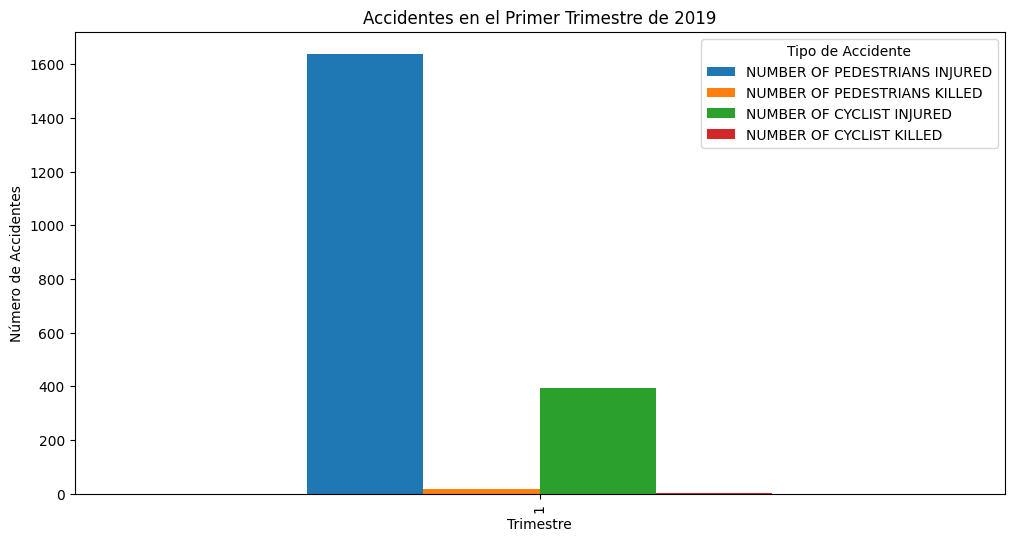

In [ ]:
# Filtrar los datos para el año 2019
accidentes_2019 = accidentes_por_mes[accidentes_por_mes['year'] == 2019]

# Crear una nueva columna 'quarter' para los trimestres
accidentes_2019['quarter'] = pd.to_datetime(accidentes_2019['month'], format='%m').dt.quarter

# Filtrar los datos para el primer trimestre
primer_trimestre = accidentes_2019[accidentes_2019['quarter'] == 1]

# Agrupar los datos por trimestre y sumar las columnas especificadas
total_accidentes_primer_trimestre = primer_trimestre.groupby(['quarter', 'year']).agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF PEDESTRIANS KILLED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF CYCLIST KILLED': 'sum'
}).reset_index()

# Crear una gráfica de barras para los datos del primer trimestre del año 2019
total_accidentes_primer_trimestre.plot(kind='bar', x='quarter', y=['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED'], figsize=(12, 6))
plt.xlabel('Trimestre')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes en el Primer Trimestre de 2019')
plt.legend(title='Tipo de Accidente')
plt.show()

En el primer semestre del año 2019, más del 50% de los accidentes que involucraron a peatones y ciclistas fueron causados por la distracción de los conductores y la falta de ceder el paso. La alta incidencia de estos accidentes subraya la necesidad urgente de mejorar la infraestructura vial, implementar campañas de concienciación y establecer políticas de seguridad más estrictas para proteger a los usuarios vulnerables de la vía.

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

<ipython-input-14-7be127dd095a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_vehiculos_muertes, x="MUERTES_POR_VEHICULO", y="Tipo de Vehiculo", palette="Reds_r", legend=False)


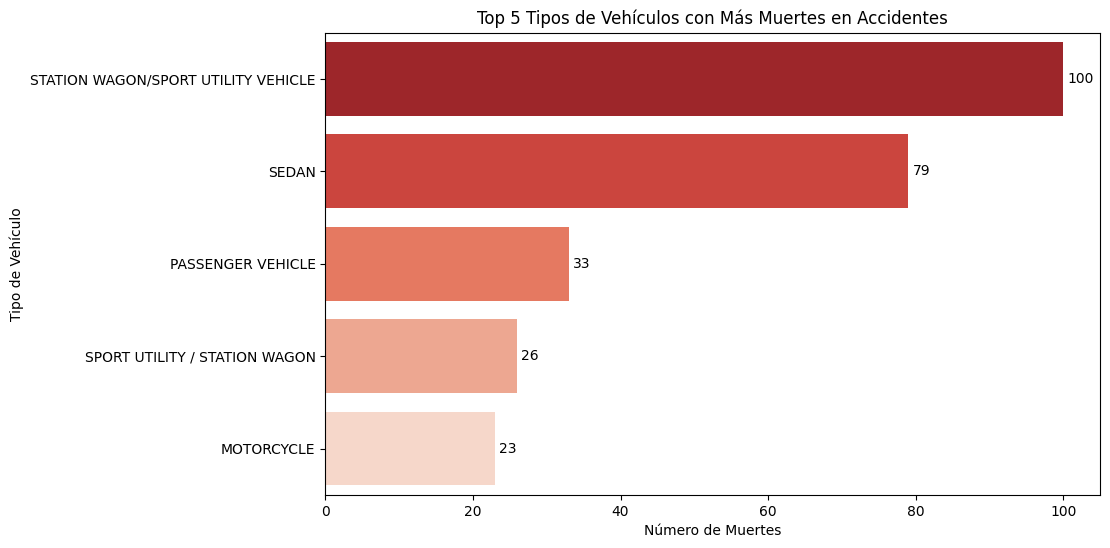

In [ ]:
# Solución propuesta
# Sumar todas las muertes en un accidente
df1["TOTAL_MUERTES"] = df1[["NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST KILLED"]].sum(axis=1)

# Seleccionar columnas de tipos de vehículos
vehiculos_cols = ["VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]

# Convertir el DataFrame de formato ancho a largo (melt)
vehiculos_muertes = df1.melt(id_vars=["TOTAL_MUERTES"], value_vars=vehiculos_cols,
                              var_name="Vehiculo", value_name="Tipo de Vehiculo")

# Limpiar datos
vehiculos_muertes = vehiculos_muertes.dropna(subset=["Tipo de Vehiculo"])
vehiculos_muertes["Tipo de Vehiculo"] = vehiculos_muertes["Tipo de Vehiculo"].str.strip().str.upper()

# Contar cuántos vehículos participaron en cada accidente
vehiculos_muertes["TOTAL_VEHICULOS_INVOLUCRADOS"] = vehiculos_muertes.groupby(vehiculos_muertes.index)["Tipo de Vehiculo"].transform("count")

# Usamos .to_numpy() asegurando que los tamaños coincidan
vehiculos_muertes["MUERTES_POR_VEHICULO"] = (vehiculos_muertes["TOTAL_MUERTES"].to_numpy() /
                                             vehiculos_muertes["TOTAL_VEHICULOS_INVOLUCRADOS"].to_numpy())

# Sumar las muertes totales por tipo de vehículo
muertes_por_vehiculo = vehiculos_muertes.groupby("Tipo de Vehiculo")["MUERTES_POR_VEHICULO"].sum().reset_index()

# Obtener el Top 5 de vehículos con más muertes
top_vehiculos_muertes = muertes_por_vehiculo.sort_values(by="MUERTES_POR_VEHICULO", ascending=False).head(5)

# Graficar
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_vehiculos_muertes, x="MUERTES_POR_VEHICULO", y="Tipo de Vehiculo", palette="Reds_r", legend=False)

# Agregar etiquetas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.xlabel("Número de Muertes")
plt.ylabel("Tipo de Vehículo")
plt.title("Top 5 Tipos de Vehículos con Más Muertes en Accidentes")
plt.show()